In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
np.random.seed(42)

In [1]:
from custom_linear_regression import CustomLinearRegression

In [222]:
df = pd.read_csv('insurance.csv')
#################################
df['sex'].replace(['male','female'],[1,-1],inplace=True)
df['smoker'].replace(['yes','no'],[1,-1],inplace=True)
df['region'].replace(['southwest','southeast','northwest','northeast'],[-1,-1,+1,+1],inplace=True)

In [223]:
train_set = df.sample(frac=0.8, random_state=42)
test_set  = df.drop(train_set.index)

X_train =  train_set.iloc[:,:-1]
Y_train =  train_set.iloc[:,-1]
X_test  =   test_set.iloc[:,:-1]
Y_test  =   test_set.iloc[:,-1]

X_train = X_train.to_numpy()     # converting dataframe to numpy array
X_test  = X_test.to_numpy()      
Y_train = Y_train.to_numpy()     
Y_test  = Y_test.to_numpy()      

Y_train = Y_train.reshape(-1,1)  # reshaping set of desired outputs to become a vector
Y_test  = Y_test .reshape(-1,1)


In [23]:
%%time                                                            # batch Gradient Descent
GD_model = CustomLinearRegression()
GD_model.fit( X_train, Y_train, loss_fn="mse", batch_size=np.shape(X_train)[0], lr=1e-5, max_iter=1000)

Wall time: 1min 13s


In [39]:
%%time                                                            # stochastic Gradient Descent
SGD_model = CustomLinearRegression()
SGD_model.fit( X_train, Y_train, loss_fn="mse", batch_size=1 , lr=1e-5, max_iter=1000)

Wall time: 173 ms


In [77]:
%%time                                                            # mini-batch Gradient Descent
mini_model = CustomLinearRegression()
mini_model.fit( X_train, Y_train, loss_fn="mse", batch_size=4, lr=1e-5, max_iter=1000)

Wall time: 359 ms


In [48]:
GD_model.score(X_test,Y_test)

0.12200563490620808

In [49]:
SGD_model.score(X_test,Y_test)

0.07693561381302871

In [78]:
mini_model.score(X_test,Y_test)

0.11771395050275979

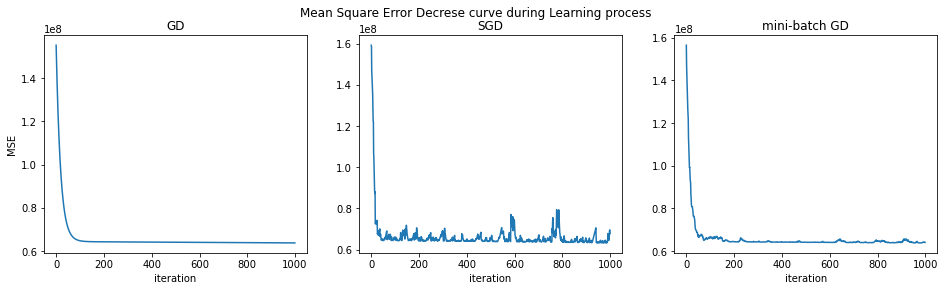

In [97]:
fig, ax = plt.subplots( 1 , 3,  figsize=(16, 4)  )

ax[0].plot(GD_model.MSE_seq)
ax[0].set_title("GD")
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('MSE')
#---------------------------------------------------------------
ax[1].plot(SGD_model.MSE_seq)
ax[1].set_title("SGD")
ax[1].set_xlabel('iteration')
#---------------------------------------------------------------
ax[2].plot(mini_model.MSE_seq)
ax[2].set_title("mini-batch GD")
ax[2].set_xlabel('iteration')
#---------------------------------------------------------------
fig.suptitle("Mean Square Error Decrese curve during Learning process")      
plt.show()

In [30]:
%%time
GD_decreased_model = CustomLinearRegression()
GD_decreased_model.fit( X_train, Y_train, loss_fn="mse", batch_size=np.shape(X_train)[0], lr=1e-6, max_iter=1000)

Wall time: 1min 12s


In [33]:
%%time
SGD_decreased_model = CustomLinearRegression()
SGD_decreased_model.fit( X_train, Y_train, loss_fn="mse", batch_size=1 , lr=1e-6, max_iter=1000)

Wall time: 161 ms


In [34]:
%%time
mini_decreased_model = CustomLinearRegression()
mini_decreased_model.fit( X_train, Y_train, loss_fn="mse", batch_size=32, lr=1e-6, max_iter=1000)

Wall time: 2.28 s


In [65]:
%%time
GD_increased_model = CustomLinearRegression()
GD_increased_model.fit( X_train, Y_train, loss_fn="mse", batch_size=np.shape(X_train)[0], lr=1e-3, max_iter=450)

Wall time: 32.9 s


In [66]:
%%time
SGD_increased_model = CustomLinearRegression()
SGD_increased_model.fit( X_train, Y_train, loss_fn="mse", batch_size=1 , lr=1e-3, max_iter=450)

Wall time: 78 ms


In [67]:
%%time
mini_increased_model = CustomLinearRegression()
mini_increased_model.fit( X_train, Y_train, loss_fn="mse", batch_size=32, lr=1e-3, max_iter=450)

Wall time: 1.03 s


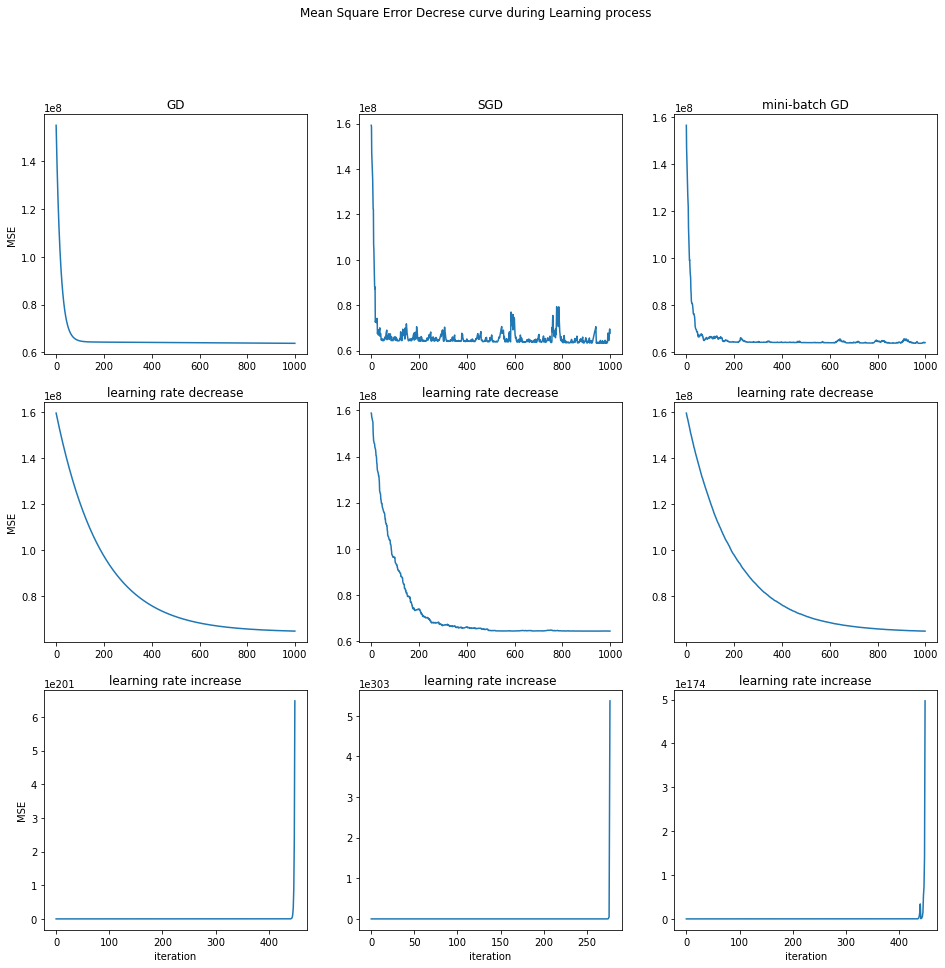

In [96]:
fig, ax = plt.subplots( 3 , 3,  figsize=(16, 15)  )

ax[0][0].plot(GD_model.MSE_seq)
ax[0][0].set_title("GD")
ax[0][0].set_ylabel('MSE')
#---------------------------------------------------------------
ax[0][1].plot(SGD_model.MSE_seq)
ax[0][1].set_title("SGD")
#---------------------------------------------------------------
ax[0][2].plot(mini_model.MSE_seq)
ax[0][2].set_title("mini-batch GD")
#---------------------------------------------------------------
ax[1][0].plot(GD_decreased_model.MSE_seq)
ax[1][0].set_title("learning rate decrease")
ax[1][0].set_ylabel('MSE')
#---------------------------------------------------------------
ax[1][1].plot(SGD_decreased_model.MSE_seq)
ax[1][1].set_title("learning rate decrease")
#---------------------------------------------------------------
ax[1][2].plot(mini_decreased_model.MSE_seq)
ax[1][2].set_title("learning rate decrease")
#---------------------------------------------------------------
ax[2][0].plot(GD_increased_model.MSE_seq)
ax[2][0].set_title("learning rate increase")
ax[2][0].set_xlabel('iteration')
ax[2][0].set_ylabel('MSE')
#ax[2][0].set_ylim(bottom=1e8, top=1e16)

#---------------------------------------------------------------
ax[2][1].plot(SGD_increased_model.MSE_seq)
ax[2][1].set_title("learning rate increase")
ax[2][1].set_xlabel('iteration')
#ax[2][1].set_ylim(bottom=1e8, top=1e16)
#---------------------------------------------------------------
ax[2][2].plot(mini_increased_model.MSE_seq)
ax[2][2].set_title("learning rate increase")
ax[2][2].set_xlabel('iteration')
#ax[2][2].set_ylim(bottom=1e8, top=1e16)

#---------------------------------------------------------------
fig.suptitle("Mean Square Error Decrese curve during Learning process")      
plt.show()

In [70]:
def Normalize(X):                                             # Scaling
    n = np.shape(X)[1] 
    
    for i in range(n):
        minimum = np.min(X[:,i])
        maximum = np.max(X[:,i])
        X[:,i] = ( X[:,i] - minimum) / (maximum - minimum)
        
    return X

In [87]:
X = np.vstack((X_train,X_test))
Xn , Yn = Normalize(X , Y)

l = int(len(X)*.8)      # number of trainin data (80% of dataset)

Xn_train = Xn[:l+1,:]   # normalized training input
Xn_test =  Xn[l+1:,:]   # normalized testing input

In [88]:
%%time
Norm_GD = CustomLinearRegression()
Norm_GD.fit( Xn_train, Yn_train, loss_fn="mse", batch_size=np.shape(Xn_train)[0], lr=1e-5, max_iter=500)

Wall time: 37 s


In [80]:
%%time
Norm_SGD = CustomLinearRegression()
Norm_SGD.fit( Xn_train, Yn_train, loss_fn="mse", batch_size=1 , lr=1e-5, max_iter=500)

Wall time: 85.9 ms


In [81]:
%%time
Norm_mini = CustomLinearRegression()
Norm_mini.fit( Xn_train, Yn_train, loss_fn="mse", batch_size=32, lr=1e-5, max_iter=500)

Wall time: 1.16 s


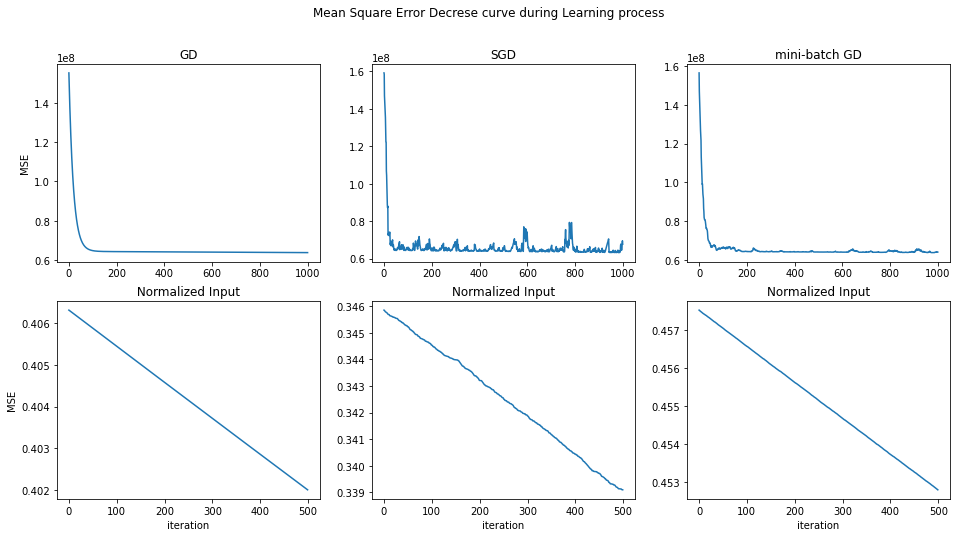

In [95]:
fig, ax = plt.subplots( 2 , 3,  figsize=(16, 8)  )

ax[0][0].plot(GD_model.MSE_seq)
ax[0][0].set_title("GD")
ax[0][0].set_ylabel('MSE')
#---------------------------------------------------------------
ax[0][1].plot(SGD_model.MSE_seq)
ax[0][1].set_title("SGD")
#---------------------------------------------------------------
ax[0][2].plot(mini_model.MSE_seq)
ax[0][2].set_title("mini-batch GD")
#---------------------------------------------------------------
ax[1][0].plot(Norm_GD.MSE_seq)
ax[1][0].set_title(" Normalized Input ")
ax[1][0].set_ylabel('MSE')
ax[1][0].set_xlabel('iteration')
#---------------------------------------------------------------
ax[1][1].plot(Norm_SGD.MSE_seq)
ax[1][1].set_title("Normalized Input")
ax[1][1].set_xlabel('iteration')
#---------------------------------------------------------------
ax[1][2].plot(Norm_mini.MSE_seq)
ax[1][2].set_title("Normalized Input")
ax[1][2].set_xlabel('iteration')
#---------------------------------------------------------------
fig.suptitle("Mean Square Error Decrese curve during Learning process")      
plt.show()

In [89]:
%%time
OLS_model = CustomLinearRegression()
OLS_model.fit_lsqr( X_train, Y_train)

Wall time: 8.99 ms


In [94]:
OLS_model.score(X_test,Y_test)       # ordinary least square

0.751545176361558

In [91]:
GD_model.score(X_test,Y_test)         # batch GD

0.12200563490620808

In [92]:
SGD_model.score(X_test,Y_test)        # SGD

0.07693561381302871

In [93]:
mini_model.score(X_test,Y_test)       # mini-batch GD

0.11771395050275979

In [220]:
from sklearn.linear_model    import LinearRegression

In [224]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [225]:
regressor.score(X_test, Y_test)

0.751545176361558

In [229]:
batch_model = CustomLinearRegression()
batch_model.fit( X_train, Y_train, loss_fn="mse", batch_size=np.shape(X_train)[0], lr=1e-4, max_iter=2000)

In [227]:
batch_model.score(X_test, Y_test)

0.25314231587148406

In [184]:
np.random.seed(42)

def underlying_fn(X):
    f_x = X**3
    return f_x

def make_dataset(u_fn=underlying_fn, noise_std=1, samples_min=0, samples_max=10, n_samples=50):
    X = np.linspace(start=samples_min, stop=samples_max, num=n_samples)
    y = u_fn(X)
    y += np.random.normal(0, noise_std, y.shape)
    return X, y

In [185]:
X,y = make_dataset(u_fn=underlying_fn, noise_std=1, samples_min=0, samples_max=10, n_samples=30)
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [5]:
def sample(X, y, test_size):                               # returns a randomly shuffled train and date set 
                                                           # X is assumed as a matrix  y is assumed as a vector
    train_size = np.shape(X)[0] - test_size
    
    data = np.hstack((X, y))
    np.random.shuffle(data)                                # shuffling the data
    
    X_train = data[0:train_size, :-1]
    y_train = data[0:train_size, -1].reshape(-1,1)
    
    X_test = data[train_size:, :-1]
    y_test = data[train_size:, -1].reshape(-1,1)
    
    return X_train, X_test, y_train, y_test

In [186]:
trainX, testX, trainY, testY = sample(X, y, 10)

In [7]:
%%time
GD_model2 = CustomLinearRegression()
GD_model2.fit( trainX, trainY, loss_fn="mse", batch_size=np.shape(trainX)[0], lr=1e-5, max_iter=1000)

Wall time: 425 ms


In [9]:
def MSE(X,Y,W,b):
    return np.mean( (X@W-Y)**2  ) /2

In [10]:
MSE(testX, testY, GD_model2.coefs_, GD_model2.intercept_ )

24506.774754765975

In [15]:
GD_model2.score(testX, testY)

0.23466457251191308

In [14]:
def quadratic(X, k):                       ## adding quadratic feature columns to X
        m = np.shape(X)[0]
        W = np.random.random([k+1,1])
        
        X=np.hstack( ( np.ones([m,1]) , X ))
        
        #################################### adding quadratic feature columns to X
        for i in range(k-1):
            quad = ( X[:,1] **(i+2) ).reshape(-1,1) # creating quadratic column
            
            quad = (1/(np.max(quad)-np.min(quad)))*(quad-np.min(quad)) #normalizing quadratic features to avoiding from overflow
            
            X=np.hstack( ( X , quad ) )
        return X

In [202]:
quadX_train_3 = quadratic(trainX,3)        # creating 3-order quadratic set
quadX_test_3  = quadratic(testX,3)

In [203]:
# learning with GD and MSE
quad_model_3 = CustomLinearRegression()
quad_model_3.fit( quadX_train_3, trainY, loss_fn="mse", batch_size=np.shape(quadX_train_3)[0], lr=1e-5, max_iter=4000)

In [204]:
quad_model_3.score(quadX_test_3, testY)

0.5938347400219697

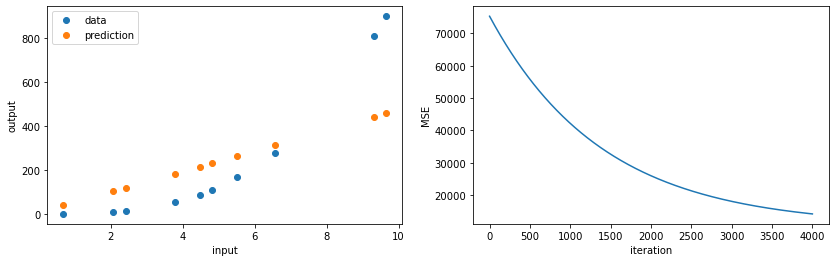

In [205]:
fig, ax = plt.subplots( 1 , 2,  figsize=(14, 4)  )

ax[0].plot(testX, testY, 'o', label="data")
ax[0].plot(testX, quad_model_3.predict(quadX_test_3), 'o', label="prediction")
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')
ax[0].legend(loc='best')
#---------------------------------------------------------------
ax[1].plot(quad_model_3.MSE_seq)
ax[1].set_ylabel('MSE')
ax[1].set_xlabel('iteration')
#---------------------------------------------------------------
plt.show()

In [187]:
quadX_train_5 = quadratic(trainX,5)        # creating 5-order quadratic set
quadX_test_5  = quadratic(testX,5)

In [195]:
# learning with GD and MSE
quad_model_5 = CustomLinearRegression()
quad_model_5.fit( quadX_train_5, trainY, loss_fn="mse", batch_size=np.shape(quadX_train_5)[0], lr=1e-4, max_iter=4000)

In [196]:
quad_model_5.score(quadX_test_5, testY)

0.7256783209007136

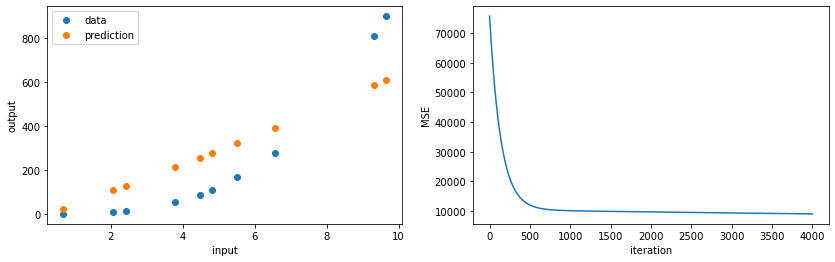

In [197]:
fig, ax = plt.subplots( 1 , 2,  figsize=(14, 4)  )

ax[0].plot(testX, testY, 'o', label="data")
ax[0].plot(testX, quad_model_5.predict(quadX_test_5), 'o', label="prediction")
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')
ax[0].legend(loc='best')
#---------------------------------------------------------------
ax[1].plot(quad_model_5.MSE_seq)
ax[1].set_ylabel('MSE')
ax[1].set_xlabel('iteration')
#---------------------------------------------------------------
plt.show()

In [191]:
quadX_train_7 = quadratic(trainX,7)        # creating 7-order quadratic set
quadX_test_7  = quadratic(testX,7)

In [192]:
# learning with GD and MSE
quad_model_7 = CustomLinearRegression()
quad_model_7.fit( quadX_train_7, trainY, loss_fn="mse", batch_size=np.shape(quadX_train_7)[0], lr=1e-4, max_iter=4000)

In [193]:
quad_model_7.score(quadX_test_7, testY)

0.7450548572551925

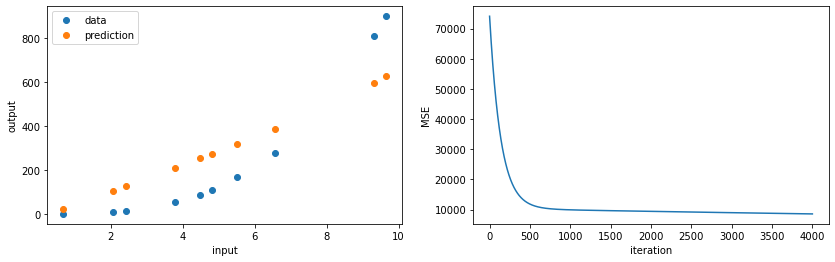

In [194]:
fig, ax = plt.subplots( 1 , 2,  figsize=(14, 4)  )

ax[0].plot(testX, testY, 'o', label="data")
ax[0].plot(testX, quad_model_7.predict(quadX_test_7), 'o', label="prediction")
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')
ax[0].legend(loc='best')
#---------------------------------------------------------------
ax[1].plot(quad_model_7.MSE_seq)
ax[1].set_ylabel('MSE')
ax[1].set_xlabel('iteration')
#---------------------------------------------------------------
plt.show()

In [133]:
quadX_train_10 = quadratic(trainX,10)        # creating 10-order quadratic set
quadX_test_10  = quadratic(testX,10)

In [134]:
# learning with GD and MSE
quad_model_10_L1 = CustomLinearRegression()
quad_model_10_L1.fit( quadX_train_10, trainY, regularization='L1', lambd=1000, loss_fn="mse", batch_size=np.shape(quadX_train_10)[0], lr=1e-5, max_iter=1000)

In [136]:
# learning with GD and MSE
quad_model_10_L2 = CustomLinearRegression()
quad_model_10_L2.fit( quadX_train_10, trainY, regularization='L2', lambd=1000, loss_fn="mse", batch_size=np.shape(quadX_train_10)[0], lr=1e-5, max_iter=1000)

In [206]:
print("L1| 10-order-weights\n",quad_model_10_L1.coefs_.reshape(1,-1))
print('--------------------------------------------------------------')
print("7-order-weights\n",quad_model_7.coefs_.reshape(1,-1))

L1| 10-order-weights
 [[ 1.09951268e-02  9.90017660e+00  5.94060890e-03 -1.94594621e-04
   5.12007029e-03 -2.86896009e-03  3.18300347e-04  3.65636156e-03
  -4.65741293e-04  6.31071704e-03  3.43772999e-03]]
--------------------------------------------------------------
7-order-weights
 [[-8.39704391 59.27203278 10.92725933 12.1003485  12.63106628 12.26019102
  12.03063252 11.61991908]]


In [44]:
print("L2| 10-order-weights\n",quad_model_10_L2.coefs_.reshape(1,-1))
print('--------------------------------------------------------------')
print("7-order-weights\n",quad_model_7.coefs_.reshape(1,-1))

L2| 10-order-weights
 [[0.28094668 2.32821941 0.19991356 0.17801281 0.16131317 0.14836638
  0.13808741 0.12964894 0.12260513 0.11664985 0.11146389]]
--------------------------------------------------------------
5-order-weights
 [[ 2.91111583 20.50874437  2.52512244  1.73631225  2.30746746  1.84755011]]


In [209]:
def underlying_fn(X):
    f_x = np.cos(X) 
    return f_x

In [210]:
X,y = make_dataset(u_fn=underlying_fn, noise_std=1, samples_min=0, samples_max=10, n_samples=30)
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [211]:
trainX, testX, trainY, testY = sample(X, y, 10)

In [212]:
# learning with GD and MSE
quad_model_3 = CustomLinearRegression()
quad_model_3.fit( quadX_train_3, trainY, loss_fn="mse", batch_size=np.shape(quadX_train_3)[0], lr=1e-4, max_iter=2000)

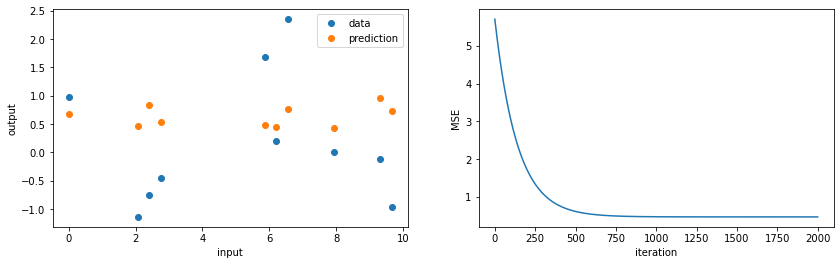

In [213]:
fig, ax = plt.subplots( 1 , 2,  figsize=(14, 4)  )

ax[0].plot(testX, testY, 'o', label="data")
ax[0].plot(testX, quad_model_3.predict(quadX_test_3), 'o', label="prediction")
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')
ax[0].legend(loc='best')
#---------------------------------------------------------------
ax[1].plot(quad_model_3.MSE_seq)
ax[1].set_ylabel('MSE')
ax[1].set_xlabel('iteration')
#---------------------------------------------------------------
plt.show()

In [214]:
quadX_train_5 = quadratic(trainX,5)        # creating 5-order quadratic set
quadX_test_5  = quadratic(testX,5)

In [215]:
# learning with GD and MSE
quad_model_5 = CustomLinearRegression()
quad_model_5.fit( quadX_train_5, trainY, loss_fn="mse", batch_size=np.shape(quadX_train_5)[0], lr=1e-4, max_iter=2000)

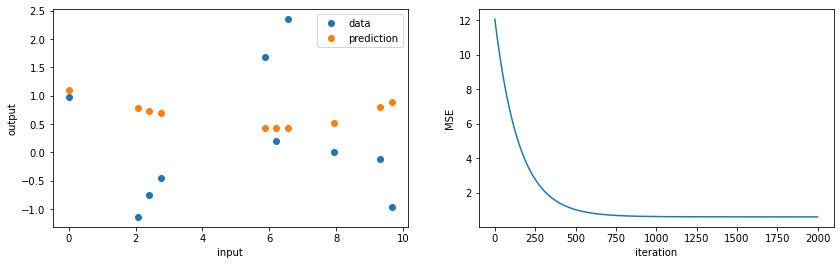

In [216]:
fig, ax = plt.subplots( 1 , 2,  figsize=(14, 4)  )

ax[0].plot(testX, testY, 'o', label="data")
ax[0].plot(testX, quad_model_5.predict(quadX_test_5), 'o', label="prediction")
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')
ax[0].legend(loc='best')
#---------------------------------------------------------------
ax[1].plot(quad_model_5.MSE_seq)
ax[1].set_ylabel('MSE')
ax[1].set_xlabel('iteration')
#---------------------------------------------------------------
plt.show()

In [217]:
quadX_train_7 = quadratic(trainX,7)        # creating 7-order quadratic set
quadX_test_7  = quadratic(testX,7)

In [218]:
# learning with GD and MSE
quad_model_7 = CustomLinearRegression()
quad_model_7.fit( quadX_train_7, trainY, loss_fn="mse", batch_size=np.shape(quadX_train_7)[0], lr=1e-4, max_iter=2000)

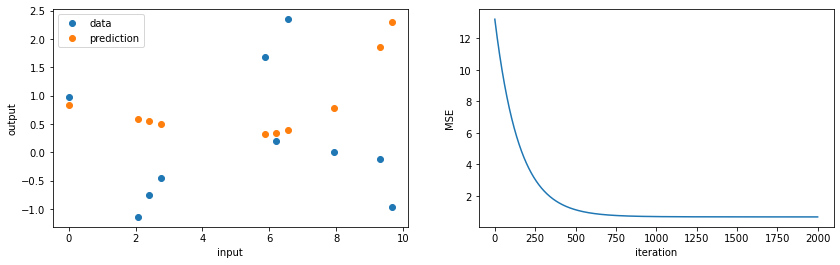

In [219]:
fig, ax = plt.subplots( 1 , 2,  figsize=(14, 4)  )

ax[0].plot(testX, testY, 'o', label="data")
ax[0].plot(testX, quad_model_7.predict(quadX_test_7), 'o', label="prediction")
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')
ax[0].legend(loc='best')
#---------------------------------------------------------------
ax[1].plot(quad_model_7.MSE_seq)
ax[1].set_ylabel('MSE')
ax[1].set_xlabel('iteration')
#---------------------------------------------------------------
plt.show()

In [14]:
DF = pd.read_csv('rideshare_kaggle.csv')

In [3]:
DF

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [129]:
DF['hour'].describe()

count    693071.000000
mean         11.619137
std           6.948114
min           0.000000
25%           6.000000
50%          12.000000
75%          18.000000
max          23.000000
Name: hour, dtype: float64

In [130]:
DF['pressure'].describe()

count    693071.000000
mean       1010.094766
std          13.472899
min         988.090000
25%         999.820000
50%        1009.250000
75%        1021.860000
max        1035.550000
Name: pressure, dtype: float64

In [5]:
DF['destination'].describe()

count                 693071
unique                    12
top       Financial District
freq                   58851
Name: destination, dtype: object

In [7]:
DF['name'].describe()

count     693071
unique        13
top       UberXL
freq       55096
Name: name, dtype: object

In [8]:
DF.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [60]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   hour                         693071 non-null  int64  
 2   day                          693071 non-null  int64  
 3   month                        693071 non-null  int64  
 4   source                       693071 non-null  object 
 5   destination                  693071 non-null  object 
 6   cab_type                     693071 non-null  object 
 7   product_id                   693071 non-null  object 
 8   price                        637976 non-null  float64
 9   distance                     693071 non-null  float64
 10  surge_multiplier             693071 non-null  float64
 11  temperature                  693071 non-null  float64
 12  apparentTemperature          693071 non-null  float64
 13 

In [15]:
DF.drop([['id']'timezone','timestamp','datetime','name','latitude','longitude','short_summary','long_summary','icon','moonPhase','uvIndexTime'] , axis=1, inplace=True)

In [132]:
def Null_info(df):
    
    null_percentage = pd.Series([], dtype='float64')
    
    for i in df.columns:
        null_percentage[i] = df.isnull().sum()[i] / len(df.index) *100
    
    Null_DF = pd.DataFrame(null_percentage)
    
    return Null_DF

In [133]:
Null_info(DF)

,0
id,0.000000
hour,0.000000
day,0.000000
month,0.000000
source,0.000000
destination,0.000000
cab_type,0.000000
product_id,0.000000
price,7.949402
distance,0.000000


In [32]:
null_indexs = DF[  DF['price'].isnull()  ].index     # finding the index number of nulls in price column

In [33]:
DF.drop(null_indexs, inplace = True)                 # removing rows which have "Null" in "price" column    

In [17]:
def Find_Cat_cols(df):                                     # returns a list of categorical features in "df" dataframe
    cols = df.columns
    num_cols = df._get_numeric_data().columns 
    cat_cols = list( set(cols) - set(num_cols)  )
    
    return cat_cols

In [156]:
Find_Cat_cols(DF)

['cab_type', 'product_id', 'source', 'id', 'destination']

In [139]:
def categories(df,feature):      # returns all unique categories which exist in "feature" feature of "df" dataframe
    
    return df[feature].value_counts()

In [140]:
categories(DF,'destination')

Financial District         54192
Back Bay                   53190
Theatre District           53189
Haymarket Square           53171
Boston University          53171
Fenway                     53166
Northeastern University    53165
North End                  53164
South Station              53159
West End                   52992
Beacon Hill                52840
North Station              52577
Name: destination, dtype: int64

Text(0.5, 1.0, 'hour')

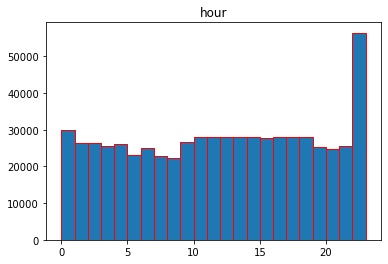

In [154]:
plt.hist(DF['hour'],edgecolor='red' , bins=np.arange(0,24,1))
plt.title('hour')

Text(0.5, 1.0, 'day')

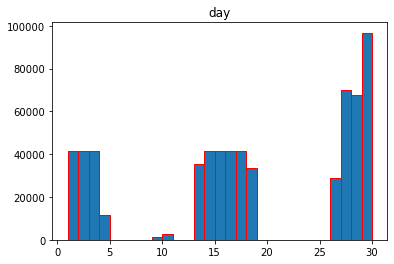

In [159]:
plt.hist(DF['day'],edgecolor='red' , bins=np.arange(1,31,1))
plt.title('day')

Text(0.5, 1.0, 'month')

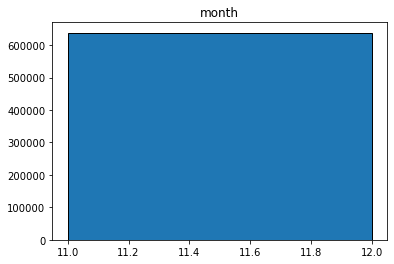

In [193]:
plt.hist(DF['month'],edgecolor='black' , bins=[11,12] )
plt.title('month')

Text(0.5, 1.0, 'distance')

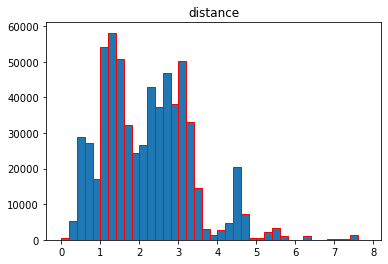

In [164]:
plt.hist(DF['distance'],edgecolor='red' , bins=np.arange(0,8,.2) )
plt.title('distance')

Text(0.5, 1.0, 'windSpeed')

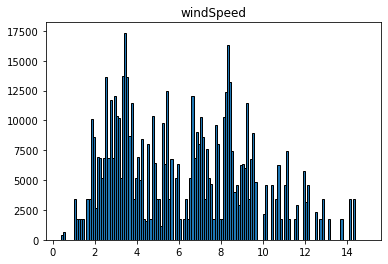

In [176]:
plt.hist(DF['windSpeed'],edgecolor='black' , bins=np.arange(.4,15,.1) )
plt.title('windSpeed')

Text(0.5, 1.0, 'precipIntensity')

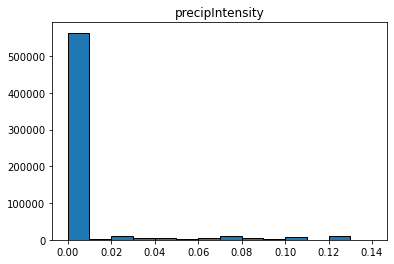

In [172]:
plt.hist(DF['precipIntensity'],edgecolor='black' , bins=np.arange(0,.14,.01) )
plt.title('precipIntensity')

Text(0.5, 1.0, 'windGust')

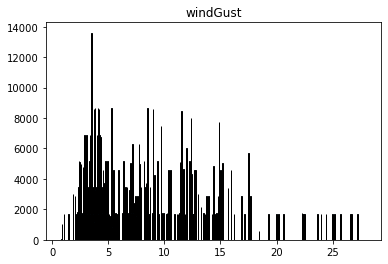

In [175]:
plt.hist(DF['windGust'],edgecolor='black' , bins=np.arange(.8,28,.05) )
plt.title('windGust')

Text(0.5, 1.0, 'visibility')

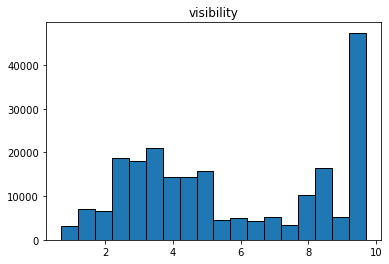

In [187]:
plt.hist(DF['visibility'],edgecolor='black' , bins=np.arange(.7,10,.5) )
plt.title('visibility')

Text(0.5, 1.0, 'windBearing')

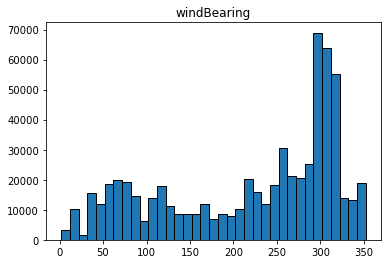

In [183]:
plt.hist(DF['windBearing'],edgecolor='black' , bins=np.arange(2,356,10) )
plt.title('windBearing')

Text(0.5, 1.0, 'cloudCover')

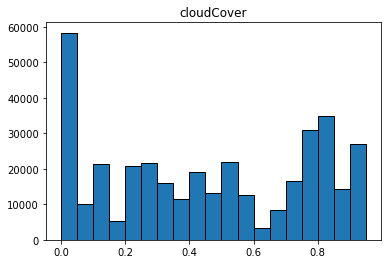

In [192]:
plt.hist(DF['cloudCover'],edgecolor='black' , bins=np.arange(0,1,.05) )
plt.title('cloudCover')

In [ ]:
import seaborn as sns 

In [12]:
corr_matrix = DF[ ['price' , 'temperature', 'hour'] ].corr()

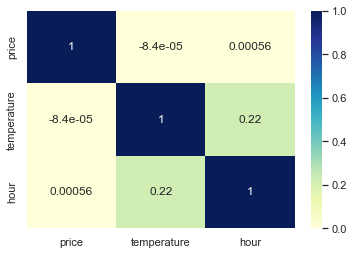

In [43]:
sns.set(rc = {'figure.figsize':(6,4)})
sns.set(font_scale=1)
ax = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)

In [11]:
corr_matrix2 = DF[ ['price' , 'temperature', 'humidity', 'windSpeed' , 'precipProbability','windGust','windGustTime','pressure','windBearing','cloudCover','ozone'] ].corr()

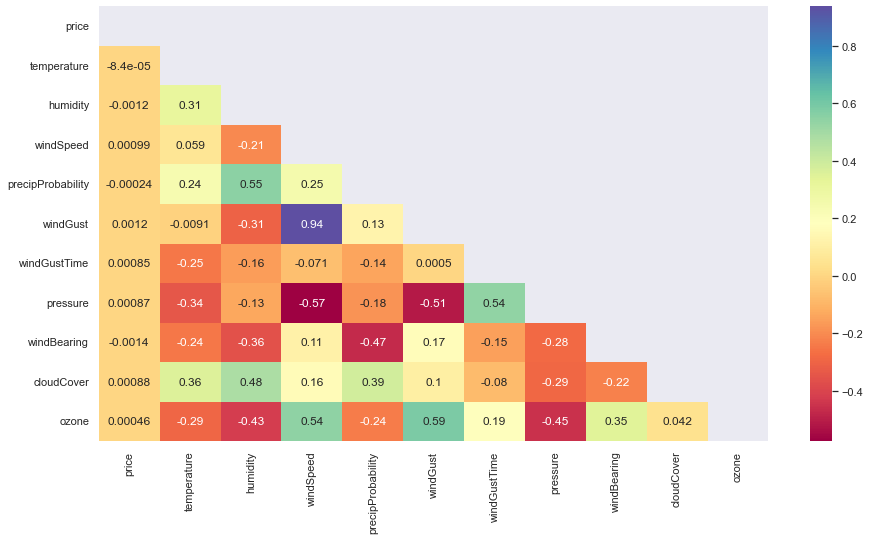

In [37]:
mask_ut = np.triu(  np.ones(corr_matrix2.shape)  ).astype(bool)

sns.set(rc = {'figure.figsize':(15,8)})

sns.set(font_scale=1)

ax = sns.heatmap(corr_matrix2, mask=mask_ut, cmap="Spectral", annot=True)

ax.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn_using_mask.png",
                   format='png',
                   dpi=150)

In [18]:
def find_skewed_features(df):
    skewed_features = []
    for i in df._get_numeric_data().skew().iteritems():        
        if abs(i[1]) >= 1 :                              # condition to capture the skewed feature
            skewed_features.append(i[0])                 # adding the feature name into the list
    return skewed_features

In [19]:
L = find_skewed_features(DF)                             # List of skewed columns

In [20]:
L

['price',
 'surge_multiplier',
 'precipIntensity',
 'precipProbability',
 'windGust',
 'visibility',
 'uvIndex',
 'visibility.1',
 'apparentTemperatureMin']

In [18]:
for i in L:                                # exchanging zeros with 1e-5 in skewed columns
    DF[i] = DF[i].replace(0,1e-5)

In [19]:
for i in L:
    DF[i] = np.log( DF[i] )

In [20]:
L2 = list (  set(DF._get_numeric_data().columns) - set(L)  )

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
for i in L2:
    DF[[i]] = scaler.fit_transform( DF[[i]]  )

In [16]:
L3 = Find_Cat_cols(DF)

In [17]:
L3             # list of categorical features

['cab_type', 'destination', 'product_id', 'source']

In [18]:
DF = pd.get_dummies(DF, columns = ['source'])

In [19]:
DF = pd.get_dummies(DF, columns = ['destination'])

In [20]:
DF = pd.get_dummies(DF, columns = ['cab_type'])

In [21]:
DF = pd.get_dummies(DF, columns = ['product_id'])

In [22]:
DF

,hour,day,month,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,...,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier
0,-0.376833,-0.180090,0.839574,1.609438,-1.540640,0.0,0.410021,0.156817,-11.512925,-11.512925,...,0,0,0,0,0,1,0,0,0,0
1,-1.384206,0.921885,-1.191081,2.397895,-1.540640,0.0,0.594394,0.185868,-2.040990,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,-1.528116,1.022065,-1.191081,1.945910,-1.540640,0.0,-0.186218,-0.372407,-11.512925,-11.512925,...,0,0,0,0,1,0,0,0,0,0
3,-1.096385,1.222424,-1.191081,3.258097,-1.540640,0.0,-0.773535,-0.789218,-11.512925,-11.512925,...,0,0,0,0,0,0,0,1,0,0
4,-1.240295,1.122244,-1.191081,2.197225,-1.540640,0.0,-0.318550,-0.631335,-11.512925,-11.512925,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.637912,-1.682784,0.839574,2.251292,-1.047427,0.0,-0.376538,0.147976,-11.512925,-11.512925,...,0,0,0,1,0,0,0,0,0,0
693066,1.637912,-1.682784,0.839574,2.564949,-1.047427,0.0,-0.376538,0.147976,-11.512925,-11.512925,...,0,1,0,0,0,0,0,0,0,0
693067,1.637912,-1.682784,0.839574,2.251292,-1.047427,0.0,-0.376538,0.147976,-11.512925,-11.512925,...,0,0,0,0,0,0,0,0,0,0
693069,1.637912,-1.682784,0.839574,3.295837,-1.047427,0.0,-0.376538,0.147976,-11.512925,-11.512925,...,1,0,0,0,0,0,0,0,0,0


In [23]:
y = DF['price']

In [24]:
DF.drop('price', inplace=True, axis=1)                        # removing "price" column from dataframe

In [25]:
X = DF

In [26]:
print(np.shape(X))
print(np.shape(y))

(637976, 78)
(637976,)


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
print(np.shape(X_train))
print(np.shape(y_train))

print(np.shape(X_test))
print(np.shape(y_test))

(446583, 78)
(446583,)
(191393, 78)
(191393,)


In [30]:
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error

In [31]:
regressor = LinearRegression()

In [32]:
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
regressor.score(X_train, y_train)

0.9385735182248341

In [34]:
y_pred_train = regressor.predict(X_train)

In [35]:
mean_squared_error(y_pred_train, y_train)

0.01986165337323572

In [36]:
y_pred_test = regressor.predict(X_test)

In [37]:
regressor.score(X_test, y_test)

0.9388924047955303

In [38]:
mean_squared_error(y_pred_test, y_test)

0.019790736092785664

In [39]:
regressor.coef_

array([ 2.18849154e-05, -3.59510885e-04,  2.58706032e-04,  1.98729028e-01,
        9.40921490e-01,  8.56514130e-03, -1.20455407e-03,  4.57133092e-05,
       -1.35116261e-04,  4.80365772e-03, -2.13221260e-03,  3.00399667e-03,
       -7.91355984e-03,  1.27248987e+10,  1.18629629e-01,  1.51736850e-01,
        5.13053071e-04,  5.29006111e-02, -8.66162232e-02, -1.36325976e-01,
        3.77483244e-04, -2.25353517e-02, -8.52928274e-03, -6.40682490e-04,
        6.42798817e-04, -5.85905001e-04, -8.14273803e-05, -1.27248987e+10,
       -8.42998454e-04, -3.73278740e-01,  3.43777261e-01, -3.89916444e-04,
       -1.19984703e-03, -1.83124878e-02, -1.12142768e-01,  7.08877419e-03,
       -2.57122663e-03,  3.10970727e-02,  7.79515565e-02, -2.84709035e-02,
        7.55540320e+09,  7.55540320e+09,  7.35335246e+10,  7.35335246e+10,
        7.55540320e+09,  7.35335246e+10,  7.35335246e+10,  7.55540320e+09,
        7.35335246e+10,  7.35335246e+10,  7.55540320e+09,  7.55540320e+09,
       -5.94427192e+10, -

In [40]:
regressor.intercept_

-1624168854.816694

In [41]:
from sklearn.linear_model    import Lasso
from sklearn.linear_model    import Ridge

In [42]:
lasso_reg = Lasso(alpha=100)
ridge_reg = Ridge(alpha=100)

In [43]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=100)

In [44]:
yp_train_lasso = lasso_reg.predict(X_train)

In [46]:
mean_squared_error(yp_train_lasso, y_train)                 ############################## Lasso - alpha = 100

0.32334024022299795

In [47]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=100)

In [48]:
yp_train_ridge = ridge_reg.predict(X_train)

In [49]:
mean_squared_error(yp_train_ridge, y_train)                 ############################## Ridge - alpha = 100

0.019871966998250955

In [50]:
lasso_reg = Lasso(alpha=10)
ridge_reg = Ridge(alpha=10)

In [51]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=10)

In [52]:
yp_train_lasso = lasso_reg.predict(X_train)

In [53]:
mean_squared_error(yp_train_lasso, y_train)                 ############################## Lasso - alpha = 10

0.32334024022299795

In [54]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=10)

In [55]:
yp_train_ridge = ridge_reg.predict(X_train)

In [56]:
mean_squared_error(yp_train_ridge, y_train)                 ############################## Ridge - alpha = 10

0.01986195834540831

In [57]:
lasso_reg = Lasso(alpha=1)
ridge_reg = Ridge(alpha=1)

In [58]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=1)

In [59]:
yp_train_lasso = lasso_reg.predict(X_train)

In [60]:
mean_squared_error(yp_train_lasso, y_train)                  ############################## Lasso - alpha = 1

0.32334024022299795

In [61]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1)

In [62]:
yp_train_ridge = ridge_reg.predict(X_train)

In [63]:
mean_squared_error(yp_train_ridge, y_train)                 ############################## Ridge - alpha = 1

0.019861593211446812

In [64]:
lasso_reg = Lasso(alpha=0.1)
ridge_reg = Ridge(alpha=0.1)

In [65]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [66]:
yp_train_lasso = lasso_reg.predict(X_train)

In [67]:
mean_squared_error(yp_train_lasso, y_train)                 ############################## Lasso - alpha = 0.1

0.29655952898745064

In [68]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [69]:
yp_train_ridge = ridge_reg.predict(X_train)

In [70]:
mean_squared_error(yp_train_ridge, y_train)                 ############################## Ridge - alpha = 0.1

0.019861554143177702

In [78]:
lasso_reg = Lasso(alpha=0.01)
ridge_reg = Ridge(alpha=0.01)

In [79]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.01)

In [80]:
yp_train_lasso = lasso_reg.predict(X_train)

In [81]:
mean_squared_error(yp_train_lasso, y_train)                 ############################## Lasso - alpha = 0.01

0.03672410105219667

In [82]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.01)

In [83]:
yp_train_ridge = ridge_reg.predict(X_train)

In [84]:
mean_squared_error(yp_train_ridge, y_train)                 ############################## Ridge - alpha = 0.01

0.019861553373699173

In [85]:
lasso_reg = Lasso(alpha=0.001)
ridge_reg = Ridge(alpha=0.001)

In [86]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [87]:
yp_train_lasso = lasso_reg.predict(X_train)

In [88]:
mean_squared_error(yp_train_lasso, y_train)                 ############################## Lasso - alpha = 0.001

0.020346419599919233

In [89]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.001)

In [90]:
yp_train_ridge = ridge_reg.predict(X_train)

In [91]:
mean_squared_error(yp_train_ridge, y_train)                 ############################## Ridge - alpha = 0.001

0.01986155330646377

In [116]:
lasso_reg = Lasso(alpha=0.0001)
ridge_reg = Ridge(alpha=0.0001)

In [117]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [95]:
yp_train_lasso = lasso_reg.predict(X_train)

In [96]:
mean_squared_error(yp_train_lasso, y_train)                 ############################## Lasso - alpha = 0.0001

0.0198708235478914

In [118]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [111]:
yp_train_ridge = ridge_reg.predict(X_train)

In [99]:
mean_squared_error(yp_train_ridge, y_train)                 ############################## Ridge - alpha = 0.0001

0.01986155315478367

In [102]:
yp_test_lasso = lasso_reg.predict(X_test)

In [112]:
yp_test_ridge  = ridge_reg.predict(X_test)

In [103]:
mean_squared_error(yp_test_lasso, y_test)                 # Lasso

0.0197902817545189

In [113]:
mean_squared_error(yp_test_ridge, y_test)                 # ridge

0.019790559687786514

In [104]:
mean_squared_error(y_pred_test, y_test)                   # linear regression

0.019790736092785664

In [119]:
lasso_reg.score(X_test, y_test)                           # Lasso

0.9388766594095166

In [120]:
ridge_reg.score(X_test, y_test)                           # ridge

0.9388929494789231

In [114]:
regressor.score(X_test, y_test)                            # linear regression

0.9388924047955303

In [121]:
from sklearn.linear_model    import SGDRegressor

In [122]:
sgd_regressor = SGDRegressor()

In [123]:
sgd_regressor.fit(X_train, y_train)

SGDRegressor()

In [124]:
yp_test_sgd = sgd_regressor.predict(X_test)

In [125]:
sgd_regressor.score(X_test, y_test)                       # SGD

0.9364577847742446

In [119]:
lasso_reg.score(X_test, y_test)                           # Lasso

0.9388766594095166

In [120]:
ridge_reg.score(X_test, y_test)                           # ridge

0.9388929494789231

In [114]:
regressor.score(X_test, y_test)                            # linear regression

0.9388924047955303

In [127]:
mean_squared_error(yp_test_sgd, y_test)                   # SGD

0.020579229277082223

In [103]:
mean_squared_error(yp_test_lasso, y_test)                 # Lasso

0.0197902817545189

In [113]:
mean_squared_error(yp_test_ridge, y_test)                 # ridge

0.019790559687786514

In [104]:
mean_squared_error(y_pred_test, y_test)                   # linear regression

0.019790736092785664